# HTAN Tumor Supervised Subtyping


In [1]:
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, "/Users/smgroves/Documents/GitHub/Groves-CellSys2021/")
import mazebox as mb


Bad key "text.kerning_factor" on line 4 in
/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# !pip install phate

## Read in Files

In [3]:
indir = "/Users/smgroves/Dropbox (VU Basic Sciences)/Quaranta_Lab/SCLC_data/scRNAseq/HTA_sclc_msk"
adata = sc.read_h5ad(op.join(indir,'adata.SCLC.010920.h5ad')) 


In [4]:
adata

AnnData object with n_obs × n_vars = 54313 × 22216
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'mito_frac', 'RBP_frac', 'batch', 'patient', 'tissue', 'treatment', 'procedure', 'SCLC_subtype', 'SCLC_subtype_plus_TP53_RB1_wt', 'pval_SCLC-A', 'pval_SCLC-N', 'pval_SCLC-P', 'NEUROD genes', 'MHCI_PRESENTATION', 'MHCII_PRESENTATION', 'SCLC_major_subtype_of_sample', 'clusters', 'treatment_categorized', 'recurrent_cluster', 'histo', 'clusters_fine'
    var: 'knnDREMI|PLCG2', 'PLCG2_modules', 'AXONOGENESIS', 'NEURON_DIFFERENTIATION', 'NEUROPEPTIDE_RECEPTOR', 'EMT'
    uns: 'diffmap_evals', 'neighbors', 'num_components', 'paga', 'umap', 'var_explained'
    obsm: 'X_diffmap', 'X_pca', 'X_umap'
    layers: 'imputed_normalized', 'log2(X+0.1)', 'normalized'
    obsp: 'connectivities', 'distances'

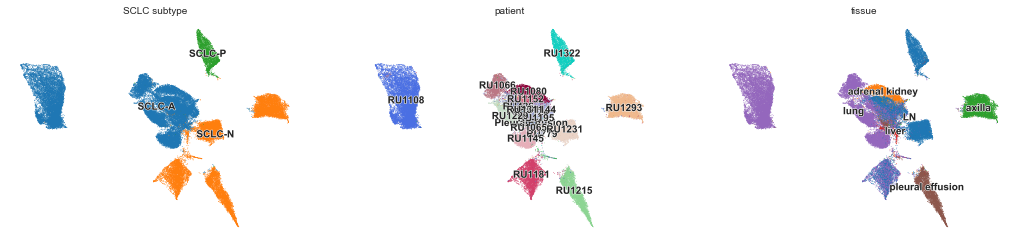

In [10]:
scv.pl.umap(adata, color = ['SCLC_subtype','patient','tissue'], legend_loc = 'on data')

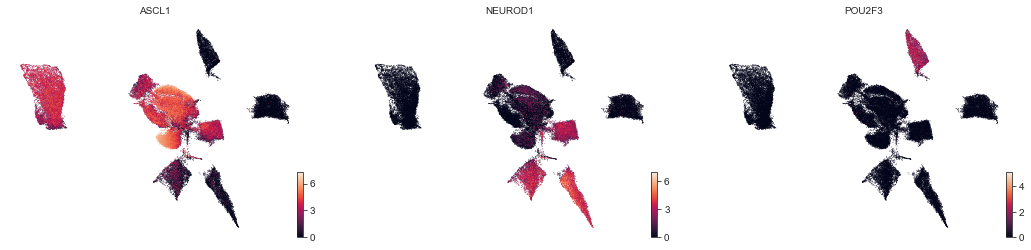

In [13]:
scv.pl.umap(adata, color = ['ASCL1','NEUROD1','POU2F3'], legend_loc = 'on data')

# Archetype supervised subtyping

In [14]:
# sig_matrix copied from Groves_CellSys2021/notebooks/out/bulk/sig_matrix_ParTI_2021.csv
sig_matrix = pd.read_csv('./sig_matrix_ParTI_2021.csv', header =0, index_col = 0)

sig_matrix = sig_matrix / np.linalg.norm(sig_matrix, axis=0)
sig_matrix.index = [i.upper() for i in sig_matrix.index]

Notice below that all 105 genes from the matrix are in the data.

Transforming tumor data...
Gene signature matrix now has shape:  (105, 5)
Tumor data shortened to genes in gene list...


Trying to set attribute `.obs` of view, copying.


(54073, 105)
Tumor data subsetting complete.


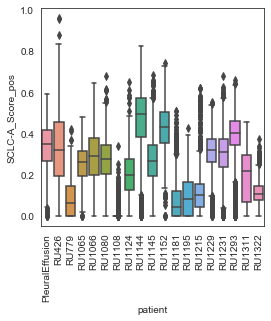

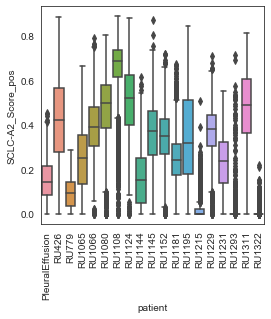

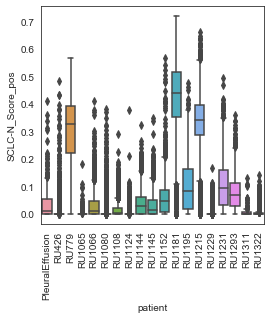

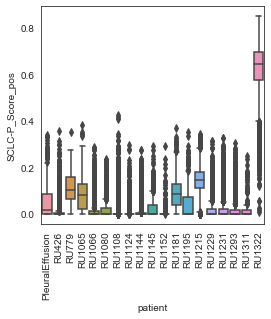

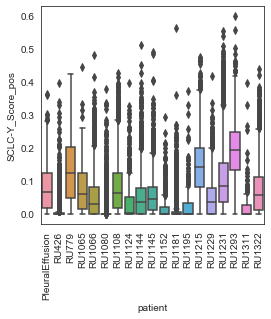

In [40]:
adata, adata_small, sig_matrix2 = mb.ar.phenotyping_recipe(adata, sig_matrix, groupby = 'patient',velocity=False, save='figures/')


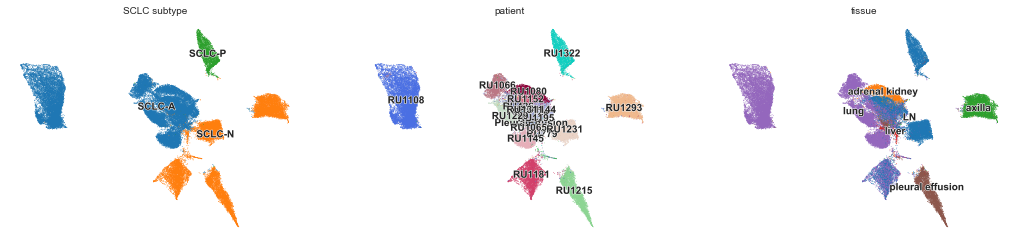

In [41]:
scv.pl.umap(adata, color = ['SCLC_subtype','patient','tissue'], legend_loc = 'on data')

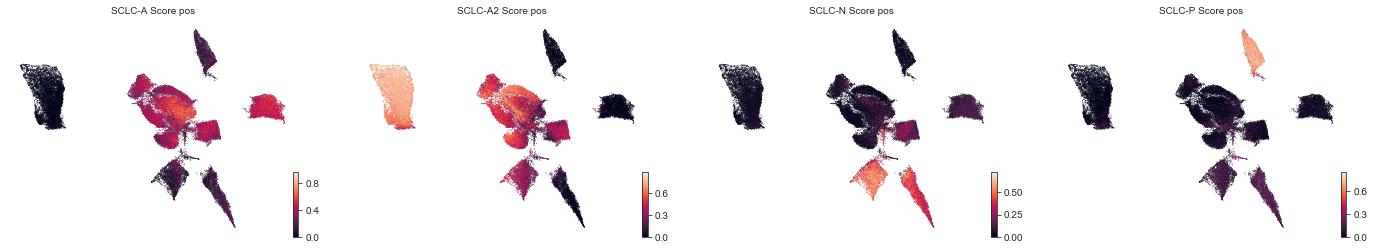

In [42]:
scv.pl.umap(adata, color = ['SCLC-A_Score_pos','SCLC-A2_Score_pos', 'SCLC-N_Score_pos','SCLC-P_Score_pos'], legend_loc = 'on data')

Project onto E/M Score Plots:

In [21]:
em_proj = pd.read_csv('./msk_EMscores.csv', index_col=0)

In [32]:
em_projection = np.array(em_proj[['E score','M score']])

In [33]:
adata.obsm['X_em_proj'] = em_projection

In [45]:
adata.obs['SCLC_subtype']

Cell
RU1215_192110488599350                      SCLC-N
RU1152_130751366121844                      SCLC-A
RU1231A_120703424294126                     SCLC-N
RU1322A_LN_133924258008493                  SCLC-P
RU1181B_169649541863334                     SCLC-N
                                             ...  
RU1108a_RPMI_160785132370275                SCLC-A
RU1293A_169220299503989                     SCLC-N
RU1108a_Bambanker_Frozen_231897696155998    SCLC-A
RU1181B_236168014327141                     SCLC-N
RU1145_120772933872502                      SCLC-A
Name: SCLC_subtype, Length: 54313, dtype: category
Categories (3, object): ['SCLC-A', 'SCLC-N', 'SCLC-P']

saving figure to file ./figures/scvelo_all_cells_UMAP_A-A2_scores.png


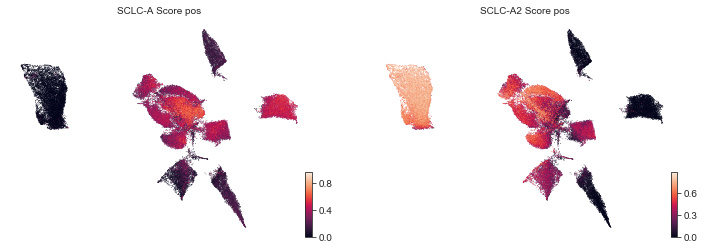

In [58]:
scv.pl.umap(adata, color = ['SCLC-A_Score_pos','SCLC-A2_Score_pos'], save='all_cells_UMAP_A-A2_scores.png',legend_loc = 'on data')


saving figure to file ./figures/scvelo_A_only_UMAP_A-A2_scores.png


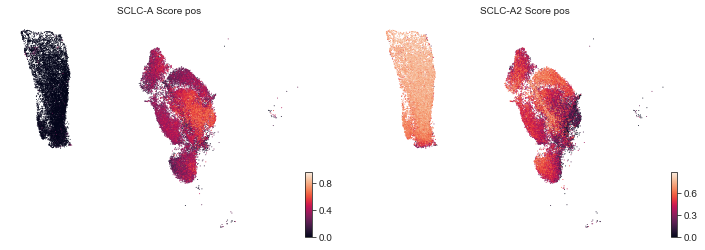

In [57]:
scv.pl.umap(adata[adata.obs['SCLC_subtype']=='SCLC-A'], color = ['SCLC-A_Score_pos','SCLC-A2_Score_pos'], save='A_only_UMAP_A-A2_scores.png',legend_loc = 'on data')


saving figure to file ./figures/scvelo_A_only_EM_proj_A-A2_scores.png


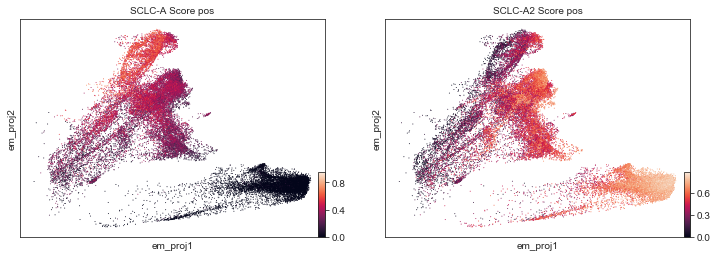

In [55]:
scv.pl.scatter(adata[adata.obs['SCLC_subtype']=='SCLC-A'], basis='em_proj',color = ['SCLC-A_Score_pos','SCLC-A2_Score_pos'], legend_loc = 'on data', save='A_only_EM_proj_A-A2_scores.png',frameon = True)


saving figure to file ./figures/scvelo_all_cells_EM_proj_A-A2_scores.png


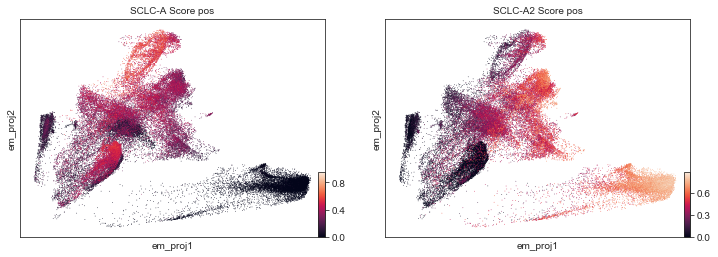

In [56]:
scv.pl.scatter(adata, basis='em_proj',color = ['SCLC-A_Score_pos','SCLC-A2_Score_pos'], legend_loc = 'on data', save='all_cells_EM_proj_A-A2_scores.png',frameon = True)

saving figure to file ./figures/scvelo_all_cells_UMAP_N-P_scores.png


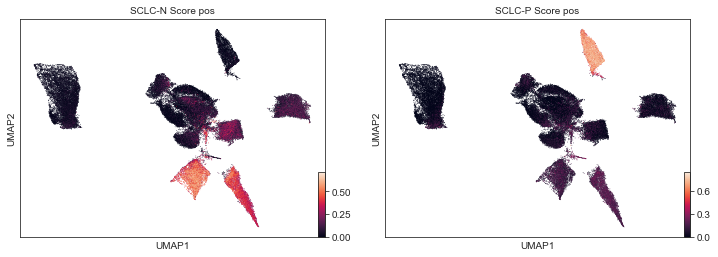

In [60]:
scv.pl.umap(adata, color = ['SCLC-N_Score_pos','SCLC-P_Score_pos'], legend_loc = 'on data', save='all_cells_UMAP_N-P_scores.png',frameon = True)


saving figure to file ./figures/scvelo_all_cells_EM_proj_N-P_scores.png


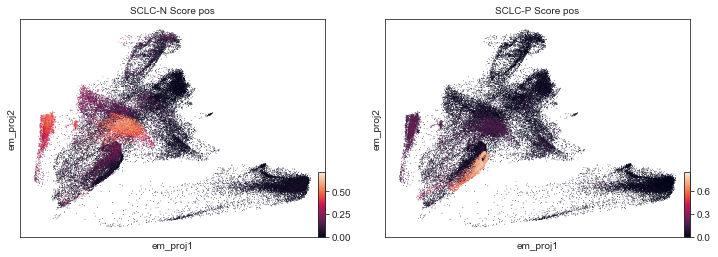

In [59]:
scv.pl.scatter(adata, basis='em_proj',color = ['SCLC-N_Score_pos','SCLC-P_Score_pos'], legend_loc = 'on data', save='all_cells_EM_proj_N-P_scores.png',frameon = True)


In [53]:
sig_matrix.sort_values('SCLC-A2', ascending=False).index[0:21]

Index(['ASCL1', 'GRP', 'CEACAM5', 'ELF3', 'SCNN1A', 'CALCA', 'TMEM176A',
       'FAM3B', 'MS4A8', 'TMEM176B', 'WFDC2', 'TSPAN1', 'TSPAN8', 'SCIN',
       'NPTX1', 'GSTP1', 'SKAP1', 'KLK11', 'KLK12', 'GJB1', 'RASSF6'],
      dtype='object')